# 설명

Google Cloud Vision API 관련 설명입니다. 이 코드를 기초로 분석 프로그램이 구성될 예정입니다. 참고 부탁드립니다.

샘플 모듈을 바탕으로 분석 클래스를 제작할 예정입니다.

-김태경 올림-

관련 링크

* [https://cloud.google.com/vision/docs/](https://cloud.google.com/vision/docs/)

## 모듈 가져오기

In [9]:
from google.cloud import vision
from google.cloud.vision import types

## 함수 정의
* **detect_label_uri()**는 uri(URL)을 입력 받습니다.결과로는 Label의 description을 돌려줍니다. 결과값 반환 타입은 list입니다.
* **detect_web_uri()**는 구글 Knowledge Graph DB에서 웹사이트의 관련 검색 결과를 받습니다.
* **detect_properties_uri()**는 이미지의 컬러 조성을 검색 결과로 받습니다.
* **detect_crop_hints_uri()**는 이미지의 데이터를 학습할 때 주로 활용한 부분을 표현합니다.
* **detect_landmarks_uri()**은 구글 Knowledge Graph DB에서 landmark 데이터를 받습니다.
* **detect_faces_uri()**는 얼굴(face) 인식 데이터를 받습니다.

In [2]:
def detect_labels_uri(uri):
    """Detects labels in the file located in Google Cloud Storage or on the
    Web."""
    client = vision.ImageAnnotatorClient()
    image = types.Image()
    image.source.image_uri = uri

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print('Labels:')
    result=[]
    for label in labels:
        result.append(label.description)
    return result

In [3]:
def detect_web_uri(uri):
    """Detects web annotations in the file located in Google Cloud Storage."""
    client = vision.ImageAnnotatorClient()
    image = types.Image()
    image.source.image_uri = uri
    response = client.web_detection(image=image)
    notes = response.web_detection
    result=[]
    if notes.web_entities:
        for entity in notes.web_entities:
            result.append({"score":entity.score,"desc":entity.description})
    return result

In [15]:
def detect_properties_uri(uri):
    """Detects image properties in the file located in Google Cloud Storage or
    on the Web."""
    client = vision.ImageAnnotatorClient()
    image = types.Image()
    image.source.image_uri = uri

    response = client.image_properties(image=image)
    props = response.image_properties_annotation
    result=[]
    for color in props.dominant_colors.colors:
        result.append({"frac":color.pixel_fraction,"red":color.color.red,"green":color.color.green,
                      "blue":color.color.blue})
    return result

In [66]:
def detect_crop_hints_uri(uri):
    """Detects crop hints in the file located in Google Cloud Storage."""
    client = vision.ImageAnnotatorClient()
    image = types.Image()
    image.source.image_uri = uri

    crop_hints_params = types.CropHintsParams(aspect_ratios=[1.77])
    image_context = types.ImageContext(crop_hints_params=crop_hints_params)

    response = client.crop_hints(image=image, image_context=image_context)
    hints = response.crop_hints_annotation.crop_hints
    result=[]
    for n, hint in enumerate(hints):
        print('\nCrop Hint: {}'.format(n))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in hint.bounding_poly.vertices])
        result.append(vertices)
    return result

In [6]:
def detect_landmarks_uri(uri):
    """Detects landmarks in the file located in Google Cloud Storage or on the
    Web."""
    client = vision.ImageAnnotatorClient()
    image = types.Image()
    image.source.image_uri = uri

    response = client.landmark_detection(image=image)
    landmarks = response.landmark_annotations
    print('Landmarks:')
    result=[]
    for landmark in landmarks:
        result.append(landmark.description)
    return result

In [87]:
def detect_faces_uri(uri):
    """Detects faces in the file located in Google Cloud Storage or the web."""
    client = vision.ImageAnnotatorClient()
    image = types.Image()
    image.source.image_uri = uri

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print("Num of faces: {}".format(len(faces)))
    print('Faces:')
    points=[]
    for face in faces:
        vertices=[]
        point_data=[]
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))
        for vertex in face.bounding_poly.vertices:
            point_data.append((vertex.x,vertex.y))
            vertices.append('({},{})'.format(vertex.x,vertex.y))
        points.append(point_data)
        print('face bounds: {}'.format(','.join(vertices)))
        print("------------------")
    return points

# 결과 예시

In [7]:
image_sample_01="https://s3-media3.fl.yelpcdn.com/bphoto/ztJRFDnj_dJmOO7RfOdNzQ/o.jpg"

<img src="https://s3-media3.fl.yelpcdn.com/bphoto/ztJRFDnj_dJmOO7RfOdNzQ/o.jpg" width="400px">

### Label detection results

In [11]:
",".join(detect_labels_uri(image_sample_01))

Labels:


'dish,dumpling,jiaozi,momo,mandu,khinkali,food,mongolian food,buuz,pelmeni'

### Web Image data from Google Knowledge DB

In [13]:
detect_web_uri(image_sample_01)

[{'desc': 'Xiaolongbao', 'score': 2.0738930702209473},
 {'desc': 'Tasty Hand-Pulled Noodles', 'score': 1.9986000061035156},
 {'desc': 'Jiaozi', 'score': 1.09879469871521},
 {'desc': 'Wonton', 'score': 1.0812160968780518},
 {'desc': 'Mandu', 'score': 1.0078587532043457},
 {'desc': 'Baozi', 'score': 0.9566797614097595},
 {'desc': 'Dim sim', 'score': 0.9054439663887024},
 {'desc': 'Buuz', 'score': 0.8909997940063477},
 {'desc': 'Pelmeni', 'score': 0.8865032196044922},
 {'desc': 'Momo', 'score': 0.8836570382118225}]

### Detection Results of Color Composition

In [16]:
detect_properties_uri(image_sample_01)

[{'blue': 163.0, 'frac': 0.28195908665657043, 'green': 191.0, 'red': 206.0},
 {'blue': 130.0, 'frac': 0.11193671822547913, 'green': 159.0, 'red': 176.0},
 {'blue': 187.0, 'frac': 0.11281559616327286, 'green': 196.0, 'red': 204.0},
 {'blue': 191.0, 'frac': 0.017577501013875008, 'green': 220.0, 'red': 235.0},
 {'blue': 135.0, 'frac': 0.02884308062493801, 'green': 185.0, 'red': 210.0},
 {'blue': 94.0, 'frac': 0.028523489832878113, 'green': 121.0, 'red': 138.0},
 {'blue': 107.0, 'frac': 0.014301693998277187, 'green': 159.0, 'red': 185.0},
 {'blue': 210.0, 'frac': 0.03427612781524658, 'green': 219.0, 'red': 227.0},
 {'blue': 57.0, 'frac': 0.046340685337781906, 'green': 84.0, 'red': 100.0},
 {'blue': 154.0, 'frac': 0.03843080997467041, 'green': 162.0, 'red': 170.0}]

### Eiffel Tower Example

In [18]:
image_sample_02="http://cdn-image.travelandleisure.com/sites/default/files/styles/1600x1000/public/1487701021/eiffel-tower-paris-france-EIFFEL0217.jpg?itok=m0MZOYjh"

<img src="http://cdn-image.travelandleisure.com/sites/default/files/styles/1600x1000/public/1487701021/eiffel-tower-paris-france-EIFFEL0217.jpg?itok=m0MZOYjh" width="500px">

### Landmark Detection Result

In [19]:
detect_landmarks_uri(image_sample_02)

Landmarks:


['Eiffel Tower']

## Face Recognition Example

In [38]:
from urllib.request import urlopen
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [94]:
def mask_image_hint(uri,crop_area):
    im = plt.imread(urlopen(uri), format='jpg')
    fig,ax = plt.subplots(1)
    ax.imshow(im)
    for ca in crop_area:
        fix_point=ca[0]
        width=ca[1][0]-ca[0][0]
        height=ca[2][1]-ca[0][1]
        rect = patches.Rectangle(fix_point,width,height,linewidth=4,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()

In [78]:
image_sample_03="http://dreamatico.com/data_images/people/people-2.jpg"

<img src="http://dreamatico.com/data_images/people/people-2.jpg" width="400px">

In [88]:
face_boundaries=detect_faces_uri(image_sample_03)

Num of faces: 5
Faces:
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (748,58),(1430,58),(1430,851),(748,851)
------------------
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (1524,319),(1959,319),(1959,859),(1524,859)
------------------
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (257,481),(636,481),(636,922),(257,922)
------------------
anger: VERY_UNLIKELY
joy: LIKELY
surprise: VERY_UNLIKELY
face bounds: (0,322),(252,322),(252,800),(0,800)
------------------
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (557,459),(875,459),(875,829),(557,829)
------------------


In [89]:
face_boundaries

[[(748, 58), (1430, 58), (1430, 851), (748, 851)],
 [(1524, 319), (1959, 319), (1959, 859), (1524, 859)],
 [(257, 481), (636, 481), (636, 922), (257, 922)],
 [(0, 322), (252, 322), (252, 800), (0, 800)],
 [(557, 459), (875, 459), (875, 829), (557, 829)]]

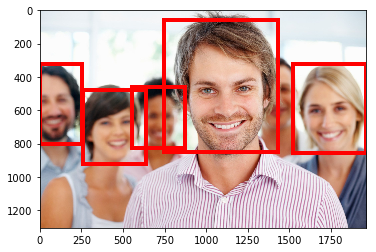

In [95]:
mask_image_hint(image_sample_03,face_boundaries)